In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
with zipfile.ZipFile("../content/drive/MyDrive/test.zip","r") as z:
    z.extractall(".")
with zipfile.ZipFile("../content/drive/MyDrive/train.zip","r") as z:
    z.extractall(".")

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

from glob import glob
import scipy
from scipy.signal import butter, lfilter, convolve, boxcar
from scipy.signal import freqz
from scipy.fftpack import fft, ifft
import os

from sklearn.preprocessing import StandardScaler



def wavelet_denoising(x, wavelet='db2', level=3):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')
def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)
#############function to read data###########

def prepare_data_train(fname):
    """ read and prepare training data """
    # Read data
    data = pd.read_csv(fname)
    # events file
    events_fname = fname.replace('_data','_events')
    # read event file
    labels= pd.read_csv(events_fname)
    clean=data.drop(['id' ], axis=1)#remove id
    labels=labels.drop(['id' ], axis=1)#remove id
    return  clean,labels

def prepare_data_test(fname):
    """ read and prepare test data """
    # Read data
    data = pd.read_csv(fname)
    return data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler= StandardScaler()
def data_preprocess_train(X):
    X_prep=scaler.fit_transform(X)
    #do here your preprocessing
    return X_prep
def data_preprocess_test(X):
    X_prep=scaler.transform(X)
    #do here your preprocessing
    return X_prep
subjects = range(1,6)
from glob import glob
import pandas as pd
ids_tot = []
pred_tot = []
X_train_butter = []
from sklearn.model_selection import train_test_split
import numpy as  np

###loop on subjects and 8 series for train data + 2 series for test data
y_raw= []
raw = []
y_rawt= []
rawt = []
for subject in subjects:
    
    ################ READ DATA ################################################
    fnames =  sorted(glob('train/subj%d_series*_data.csv' % (subject)))


#    fnames =  glob('../input/train/subj1_series1_events.csv')
#    fnames =  glob('../input/train/subj1_series1_data.csv')
    for fname in fnames:
      data,labels=prepare_data_train(fname)
      raw.append(data)
      y_raw.append(labels)

    for fname in fnames:
      with open(fname) as myfile:
        head = [next(myfile) for x in range(10)]
        

      
        
X = pd.concat(raw)
y = pd.concat(y_raw)
    #transform in numpy array
    #transform train data in numpy array
X_train =np.asarray(X.astype(float))
y_train = np.asarray(y.astype(float))



from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
scaler= StandardScaler()
def data_preprocess_train(X):
    X_prep=scaler.fit_transform(X)
    #do here your preprocessing
    return X_prep
fs = 500.0
lowcut = 7.0
highcut = 30.0


x_train_butter=wavelet_denoising(X_train)
x_train=data_preprocess_train(x_train_butter)
splitrate=-x_train.shape[0]//5*2
xval=x_train[splitrate:splitrate//2]
yval=y_train[splitrate:splitrate//2]
xtest=x_train[splitrate//2:]
ytest=y_train[splitrate//2:]
xtrain=x_train[:splitrate]
ytrain=y_train[:splitrate]

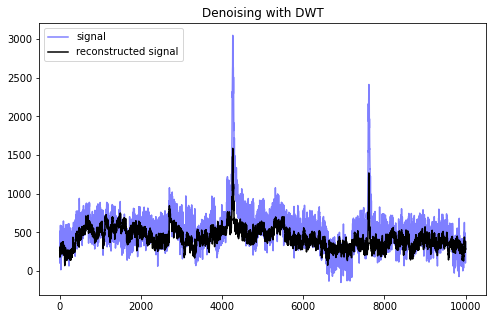

In [4]:
import pywt
import pandas as pd
import numpy as np
def wavelet_denoising(x, wavelet='db2', level=3):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')
def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

signal=pd.read_csv('train/subj1_series1_data.csv')
signal = signal.drop("id", axis=1)
filtered = wavelet_denoising(signal, wavelet='db2', level=3)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(signal.iloc[:10000,1], label='signal', color="b", alpha=0.5,)
ax.plot(filtered[:10000,1], label='reconstructed signal',color="k")
ax.legend(loc='upper left')
ax.set_title('Denoising with DWT')
plt.show()

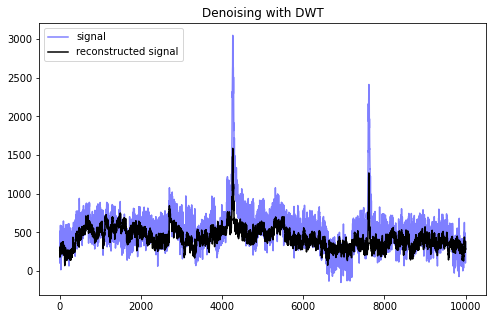

In [5]:
import pywt
import pandas as pd
import numpy as np
def wavelet_denoising(x, wavelet='db2', level=3):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')
def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

signal=pd.read_csv('train/subj1_series1_data.csv')
signal = signal.drop("id", axis=1)
filtered = wavelet_denoising(signal, wavelet='db2', level=3)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(signal.iloc[:10000,1], label='signal', color="b", alpha=0.5,)
ax.plot(filtered[:10000,1], label='reconstructed signal',color="k")
ax.legend(loc='upper left')
ax.set_title('Denoising with DWT')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


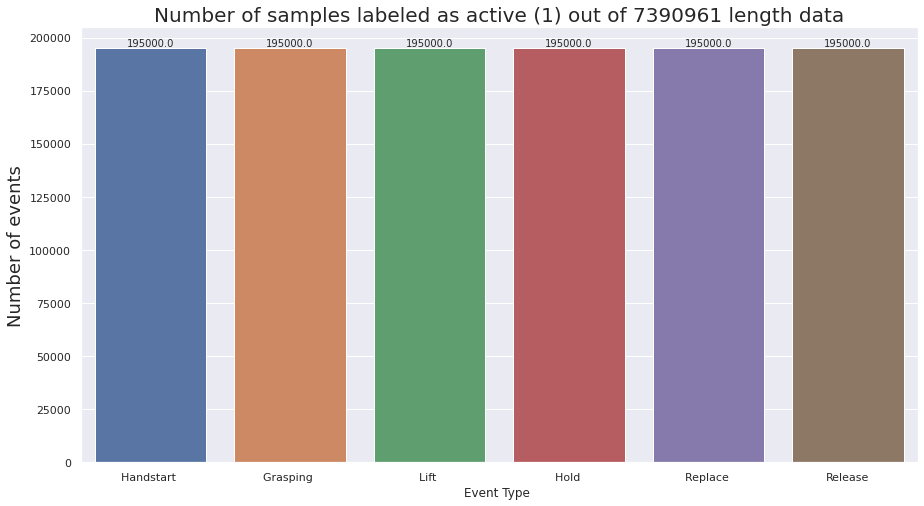

In [6]:
import seaborn as sns
ye=pd.DataFrame(y_train)

ye.columns=["Handstart ","Grasping ","Lift ","Hold ","Replace ","Release"]
categories = list(ye.columns.values)
sns.set(font_scale = 1)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, ye.iloc[:,0:].sum().values)
plt.title("Number of samples labeled as active (1) out of {0} length data".format((ye.shape[0])),fontsize=20)

plt.ylabel('Number of events', fontsize=18)
plt.xlabel('Event Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = ye.iloc[:,0:].sum().values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=10)
plt.show()

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM, BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout, Activation
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM, BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout, Activation, Bidirectional
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf

In [13]:
time_steps = 1000
subsample = 10
model3 = Sequential()
model3.add(Bidirectional(LSTM(64,  return_sequences=True), input_shape = (time_steps//subsample, 32)))
#model3.add(Dropout(0.5))
model3.add(Bidirectional(LSTM(64, return_sequences=True), input_shape = (time_steps//subsample, 32)))
#model3.add(Dropout(0.5))
model3.add(LSTM(64,input_shape = (time_steps//subsample, 32), return_sequences=True))
#model3.add(Dropout(0.5))
model3.add(Bidirectional(LSTM(64)))
model3.add(Dense(6, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer= Adam(lr = 0.0001), metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 100, 128)         49664     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 100, 128)         98816     
 nal)                                                            
                                                                 
 lstm_10 (LSTM)              (None, 100, 64)           49408     
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                      

In [14]:
def valgenerator():
    while 1:
        batch_size=32
        x_time_data = np.zeros((batch_size, time_steps//subsample, 32))
        yy = []
        for i in range(batch_size):
            random_index = np.random.randint(0, len(xval)-time_steps)
            x_time_data[i] = xval[random_index:random_index+time_steps:subsample]
            yy.append(yval[random_index + time_steps])
        yy = np.asarray(yy)
        yield x_time_data, yy

In [15]:
import time
start=time.time()
def generator(batch_size):
    while 1:
        
        x_time_data = np.zeros((batch_size, time_steps//subsample, 32))
        yy = []
        for i in range(batch_size):
            random_index = np.random.randint(0, len(xtrain)-time_steps)
            x_time_data[i] = xtrain[random_index:random_index+time_steps:subsample]
            yy.append(ytrain[random_index + time_steps])
        yy = np.asarray(yy)
        yield x_time_data, yy

history =model3.fit_generator(generator(32), steps_per_epoch = 200, epochs = 50,validation_data=valgenerator(),
                              validation_steps=100)
print('training time taken: ',round(time.time()-start,0),'seconds')

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


200/200 [==============================] - 103s 454ms/step - loss: 0.2439 - accuracy: 0.4242 - val_loss: 0.1364 - val_accuracy: 0.0338
Epoch 2/50
200/200 [==============================] - 86s 433ms/step - loss: 0.1238 - accuracy: 0.0248 - val_loss: 0.1342 - val_accuracy: 0.0122
Epoch 3/50
200/200 [==============================] - 88s 442ms/step - loss: 0.1206 - accuracy: 0.3575 - val_loss: 0.1181 - val_accuracy: 0.5791
Epoch 4/50
200/200 [==============================] - 87s 433ms/step - loss: 0.1177 - accuracy: 0.1603 - val_loss: 0.1320 - val_accuracy: 0.0378
Epoch 5/50
200/200 [==============================] - 89s 443ms/step - loss: 0.1229 - accuracy: 0.2633 - val_loss: 0.1261 - val_accuracy: 0.3041
Epoch 6/50
200/200 [==============================] - 90s 448ms/step - loss: 0.1149 - accuracy: 0.4663 - val_loss: 0.1312 - val_accuracy: 0.3622
Epoch 7/50
200/200 [==============================] - 85s 426ms/step - loss: 0.1188 - accuracy: 0.4897 - val_loss: 0.1234 - val_accuracy: 0.